In [1]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn import cross_validation, grid_search, metrics, ensemble

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np

/home/dada/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/dada/.local/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
import pandas as pd
train_meta = pd.read_csv('stack/train_meta3.csv')
test_meta = pd.read_csv('stack/test_meta3.csv')
train_meta = train_meta.drop(columns=['Unnamed: 0'])
test_meta = test_meta.drop(columns=['Unnamed: 0'])
train_meta.head()

,Book-Rating,ISBN,User-ID,age,loc,author,years,publisher,foldID,surprise,FM,keras,XGBRegressor,XGBClassifier
0,8.0,133745,6329,47.0,18959,41855,1992.0,560,3,7.0,7.0,8,7,7
1,10.0,21147,75160,0.0,9894,37869,2001.0,4132,3,8.0,7.0,8,8,8
2,8.0,13559,886,29.0,4962,62104,0.0,11567,4,8.0,8.0,8,8,8
3,10.0,31266,57887,0.0,15860,45272,1997.0,2678,5,8.0,7.0,8,7,8
4,9.0,80349,46556,45.0,8588,11258,2000.0,4553,4,10.0,8.0,10,9,10


In [3]:
train_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260202 entries, 0 to 260201
Data columns (total 14 columns):
Book-Rating      260202 non-null float64
ISBN             260202 non-null int64
User-ID          260202 non-null int64
age              260202 non-null float64
loc              260202 non-null int64
author           260202 non-null int64
years            260202 non-null float64
publisher        260202 non-null int64
foldID           260202 non-null int64
surprise         260202 non-null float64
FM               260202 non-null float64
keras            260202 non-null int64
XGBRegressor     260202 non-null int64
XGBClassifier    260202 non-null int64
dtypes: float64(5), int64(9)
memory usage: 27.8 MB


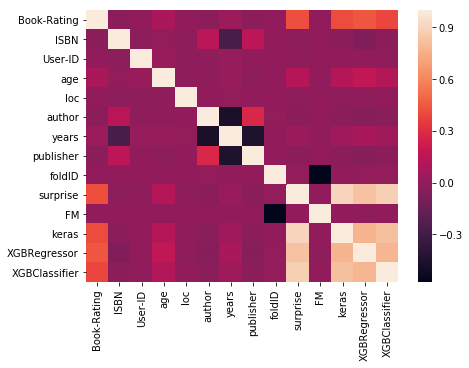

In [4]:
import seaborn as sns
plt.figure(figsize=[7,5])
sns.heatmap(train_meta.corr())
plt.show()

In [5]:
def plot_importance(m, feature_list=['User-ID', 'ISBN', 'loc', 'age', 'author', 'publisher', 'years']):
    try:
        df = train.copy()
        df_plot = pd.DataFrame({'features': feature_list, 'importances': m.feature_importances_})
        df_plot = df_plot.sort_values('importances', ascending=False)

        plt.figure(figsize=[11,5])
        sns.barplot(x = df_plot.importances, y = df_plot.features)
        plt.title('Importances of Features Plot')
        plt.show()
    except KeyboardInterrupt:
        print ('KeyboardInterrupt')
    except:
        print ('no feature importance')

In [6]:
# baselines
stack_feature_list = ['XGBRegressor', 'XGBClassifier', 'surprise', 'keras', 'FM']
pred = []
for i in stack_feature_list:
    print (i)
    p = train_meta[i].values
    print (MAE(p, train_meta['Book-Rating'].values))
    pred.append(p)
    
pred = np.round(np.mean(pred, 0))
print ('mean')
print (MAE(pred, train_meta['Book-Rating'].values))

XGBRegressor
1.2264433017424923
XGBClassifier
1.266796565745075
surprise
1.2186493570379935
keras
1.2332072774229252
FM
1.4966064826557828
mean
1.240828279567413


In [7]:
from sklearn.svm import LinearSVR, LinearSVC
stack_feature_list = ['XGBRegressor', 'XGBClassifier', 'surprise', 'keras', 'FM']
mean = 0
for f in range(5):
    train_fold = train_meta[train_meta.foldID != f+1]
    val_fold = train_meta[train_meta.foldID == f+1]

    x_train, y_train = train_fold[stack_feature_list], train_fold['Book-Rating']
    x_val, y_val = val_fold[stack_feature_list], val_fold['Book-Rating']
    
    print ("fold", f+1, ', data length:', len(x_train))
    model = LinearSVR()
    model.fit(x_train, y_train)
    pred = model.predict(x_val)
    pred = np.round(pred)
    mae = MAE(pred, y_val)
    mean += mae
    print ("\t", 'validation score:', mae)

print ('mean:', mean/5)

fold 1 , data length: 208161
	 validation score: 1.2165984512211525
fold 2 , data length: 208161
	 validation score: 1.215138064218597
fold 3 , data length: 208162
	 validation score: 1.2186971560338202
fold 4 , data length: 208162
	 validation score: 1.2164296694850116
fold 5 , data length: 208162
	 validation score: 1.2193889315910837
mean: 1.217250454509933


In [7]:
from keras import 
stack_feature_list = ['XGBRegressor', 'XGBClassifier', 'surprise', 'keras', 'FM']
mean = 0
for f in range(5):
    train_fold = train_meta[train_meta.foldID != f+1]
    val_fold = train_meta[train_meta.foldID == f+1]

    x_train, y_train = train_fold[stack_feature_list], train_fold['Book-Rating']
    x_val, y_val = val_fold[stack_feature_list], val_fold['Book-Rating']
    
    print ("fold", f+1, ', data length:', len(x_train))
    model = LinearSVR()
    model.fit(x_train, y_train)
    pred = model.predict(x_val)
    pred = np.round(pred)
    mae = MAE(pred, y_val)
    mean += mae
    print ("\t", 'validation score:', mae)

print ('mean:', mean/5)

fold 1 , data length: 208161
	 validation score: 1.2165984512211525
fold 2 , data length: 208161
	 validation score: 1.215138064218597
fold 3 , data length: 208162
	 validation score: 1.2186971560338202
fold 4 , data length: 208162
	 validation score: 1.2164296694850116
fold 5 , data length: 208162
	 validation score: 1.2193889315910837
mean: 1.217250454509933


In [24]:
from sklearn.svm import LinearSVR, LinearSVC
stack_feature_list = ['XGBRegressor', 'XGBClassifier', 'surprise', 'keras', 'FM']
mean = 0
for f in range(5):
    train_fold = train_meta[train_meta.foldID != f+1]
    val_fold = train_meta[train_meta.foldID == f+1]

    x_train, y_train = train_fold[stack_feature_list], train_fold['Book-Rating']
    x_val, y_val = val_fold[stack_feature_list], val_fold['Book-Rating']
    
    print ("fold", f+1, ', data length:', len(x_train))
    
    model = LinearSVR()
    model.fit(x_train, y_train)
    pred = model.predict(x_val)
    pred = np.round(pred)
    mae = MAE(pred, y_val)
    mean += mae
    print ("\t", 'validation score:', mae)

print ('mean:', mean/5)

fold 1 , data length: 208161
	 validation score: 1.2150996329816874
fold 2 , data length: 208161
	 validation score: 1.2153878672585077
fold 3 , data length: 208162
	 validation score: 1.2186779400461183
fold 4 , data length: 208162
	 validation score: 1.216967717140661
fold 5 , data length: 208162
	 validation score: 1.219369715603382
mean: 1.2171005746060712


In [23]:
train_meta.to_csv('stack/train_meta3.csv')
test_meta.to_csv('stack/test_meta3.csv')
train_meta.head()

,Book-Rating,ISBN,User-ID,age,loc,author,years,publisher,foldID,surprise,FM,keras,XGBRegressor,XGBClassifier
0,8.0,133745,6329,47.0,18959,41855,1992.0,560,3,7.0,7.0,8,7,7
1,10.0,21147,75160,0.0,9894,37869,2001.0,4132,3,8.0,7.0,8,8,8
2,8.0,13559,886,29.0,4962,62104,0.0,11567,4,8.0,8.0,8,8,8
3,10.0,31266,57887,0.0,15860,45272,1997.0,2678,5,8.0,7.0,8,7,8
4,9.0,80349,46556,45.0,8588,11258,2000.0,4553,4,10.0,8.0,10,9,10


In [9]:
from sklearn.metrics import make_scorer
def my_mae(ground, preds):
    return MAE(ground, np.round(preds))

In [11]:
# create combinations of features
from itertools import combinations
all_combin = []
for k in range(1, len(stack_feature_list)):
    for j in combinations(stack_feature_list, k):
        all_combin.append(j)

print (all_combin)

[('XGBRegressor',), ('XGBClassifier',), ('surprise',), ('keras',), ('FM',), ('XGBRegressor', 'XGBClassifier'), ('XGBRegressor', 'surprise'), ('XGBRegressor', 'keras'), ('XGBRegressor', 'FM'), ('XGBClassifier', 'surprise'), ('XGBClassifier', 'keras'), ('XGBClassifier', 'FM'), ('surprise', 'keras'), ('surprise', 'FM'), ('keras', 'FM'), ('XGBRegressor', 'XGBClassifier', 'surprise'), ('XGBRegressor', 'XGBClassifier', 'keras'), ('XGBRegressor', 'XGBClassifier', 'FM'), ('XGBRegressor', 'surprise', 'keras'), ('XGBRegressor', 'surprise', 'FM'), ('XGBRegressor', 'keras', 'FM'), ('XGBClassifier', 'surprise', 'keras'), ('XGBClassifier', 'surprise', 'FM'), ('XGBClassifier', 'keras', 'FM'), ('surprise', 'keras', 'FM'), ('XGBRegressor', 'XGBClassifier', 'surprise', 'keras'), ('XGBRegressor', 'XGBClassifier', 'surprise', 'FM'), ('XGBRegressor', 'XGBClassifier', 'keras', 'FM'), ('XGBRegressor', 'surprise', 'keras', 'FM'), ('XGBClassifier', 'surprise', 'keras', 'FM')]


In [12]:
# feature selection
best_score = 99
best_com = ""

for com in all_combin:
    
    stack_feature_list = [i for i in com]
    print (stack_feature_list)

    S = LinearSVR()
    
    grid = grid_search.GridSearchCV(S,
                            parameters,
                            cv = 5,
                            n_jobs = 5,
                            scoring = make_scorer(my_mae, greater_is_better=False),
                            verbose=True)

    grid.fit(train_meta[stack_feature_list], train_meta['Book-Rating'])

    if -grid.best_score_ < best_score:
        best_score = -grid.best_score_
        best_com = com
    print (-grid.best_score_ , best_score)
    
print (best_score, best_com)

['XGBRegressor']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    4.2s remaining:    6.3s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    4.6s finished


1.2264433017424923 1.2264433017424923
['XGBClassifier']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    5.8s remaining:    8.8s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    6.1s finished


1.266796565745075 1.2264433017424923
['surprise']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    4.7s remaining:    7.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    5.3s finished


1.2186493570379935 1.2186493570379935
['keras']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    5.0s remaining:    7.6s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    5.5s finished


1.2332072774229252 1.2186493570379935
['FM']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    2.7s remaining:    4.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    3.3s finished


1.434985126939839 1.2186493570379935
['XGBRegressor', 'XGBClassifier']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   11.1s remaining:   16.6s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   12.4s finished


1.2264433017424923 1.2186493570379935
['XGBRegressor', 'surprise']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   10.3s remaining:   15.4s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   12.8s finished


1.2186493570379935 1.2186493570379935
['XGBRegressor', 'keras']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   11.6s remaining:   17.4s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   14.0s finished


1.2213242019661648 1.2186493570379935
['XGBRegressor', 'FM']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    5.7s remaining:    8.6s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    7.0s finished


1.2264433017424923 1.2186493570379935
['XGBClassifier', 'surprise']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   10.9s remaining:   16.4s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   12.7s finished


1.2186493570379935 1.2186493570379935
['XGBClassifier', 'keras']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   18.1s remaining:   27.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   20.5s finished


1.2332072774229252 1.2186493570379935
['XGBClassifier', 'FM']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   10.7s remaining:   16.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   11.5s finished


1.266796565745075 1.2186493570379935
['surprise', 'keras']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   10.1s remaining:   15.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   10.7s finished


1.2186493570379935 1.2186493570379935
['surprise', 'FM']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    6.3s remaining:    9.5s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    7.7s finished


1.2186493570379935 1.2186493570379935
['keras', 'FM']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    7.8s remaining:   11.7s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    8.7s finished


1.2332072774229252 1.2186493570379935
['XGBRegressor', 'XGBClassifier', 'surprise']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   19.9s remaining:   29.9s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   24.4s finished


1.2186493570379935 1.2186493570379935
['XGBRegressor', 'XGBClassifier', 'keras']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   19.4s remaining:   29.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   21.1s finished


1.2227423309582555 1.2186493570379935
['XGBRegressor', 'XGBClassifier', 'FM']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   20.4s remaining:   30.6s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   21.1s finished


1.2264433017424923 1.2186493570379935
['XGBRegressor', 'surprise', 'keras']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   23.6s remaining:   35.4s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   24.1s finished


1.2186493570379935 1.2186493570379935
['XGBRegressor', 'surprise', 'FM']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   18.9s remaining:   28.3s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   20.4s finished


1.2186493570379935 1.2186493570379935
['XGBRegressor', 'keras', 'FM']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   19.7s remaining:   29.6s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   20.5s finished


1.223672377614315 1.2186493570379935
['XGBClassifier', 'surprise', 'keras']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   21.0s remaining:   31.5s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   21.9s finished


1.2186493570379935 1.2186493570379935
['XGBClassifier', 'surprise', 'FM']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   18.8s remaining:   28.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   20.1s finished


1.2186493570379935 1.2186493570379935
['XGBClassifier', 'keras', 'FM']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   24.5s remaining:   36.8s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   25.3s finished


1.2332072774229252 1.2186493570379935
['surprise', 'keras', 'FM']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   15.2s remaining:   22.7s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   16.6s finished


1.2186493570379935 1.2186493570379935
['XGBRegressor', 'XGBClassifier', 'surprise', 'keras']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   28.0s remaining:   42.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   28.7s finished


1.2184495123019807 1.2184495123019807
['XGBRegressor', 'XGBClassifier', 'surprise', 'FM']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   27.1s remaining:   40.6s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   27.4s finished


1.2186493570379935 1.2184495123019807
['XGBRegressor', 'XGBClassifier', 'keras', 'FM']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   26.0s remaining:   39.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   26.9s finished


1.2144564607497252 1.2144564607497252
['XGBRegressor', 'surprise', 'keras', 'FM']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   25.9s remaining:   38.9s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   27.0s finished


1.2186493570379935 1.2144564607497252
['XGBClassifier', 'surprise', 'keras', 'FM']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   27.8s remaining:   41.7s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   28.4s finished


1.2186493570379935 1.2144564607497252
1.2144564607497252 ('XGBRegressor', 'XGBClassifier', 'keras', 'FM')


In [29]:
# hyperparameters grid search
stack_feature_list = [i for i in best_com]
print (stack_feature_list)
S = LinearSVR()
#parameters = {'C':[0.01, 0.1, 1, 10]}
parameters = {'C':[1]}
grid = grid_search.GridSearchCV(S,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        scoring = make_scorer(my_mae, greater_is_better=False),
                        verbose=True)

grid.fit(train_meta[stack_feature_list], train_meta['Book-Rating'])

print(grid.best_score_)
print(grid.best_params_)
print(grid.grid_scores_)

['XGBRegressor', 'XGBClassifier', 'keras', 'FM']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   25.5s remaining:   38.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   26.4s finished


-1.21374931783768
{'C': 1}
[mean: -1.21375, std: 0.00942, params: {'C': 1}]


In [18]:
# fit on all train data
stack_feature_list = [i for i in best_com]
S = LinearSVR(grid.best_params_)
S.fit(train_meta[stack_feature_list], train_meta['Book-Rating'])
plot_importance(S, stack_feature_list)
final_pred = S.predict(test_meta[stack_feature_list])

no feature importance


In [21]:
from sklearn.externals import joblib
joblib.dump(model, 'stack/stack.pkl')

['stack/stack.pkl']

In [19]:
# output
with open('stack/final.csv', 'w') as f:
    for i in final_pred:
        print (int(round(i)), file=f)